Plot the correlation plots and save 

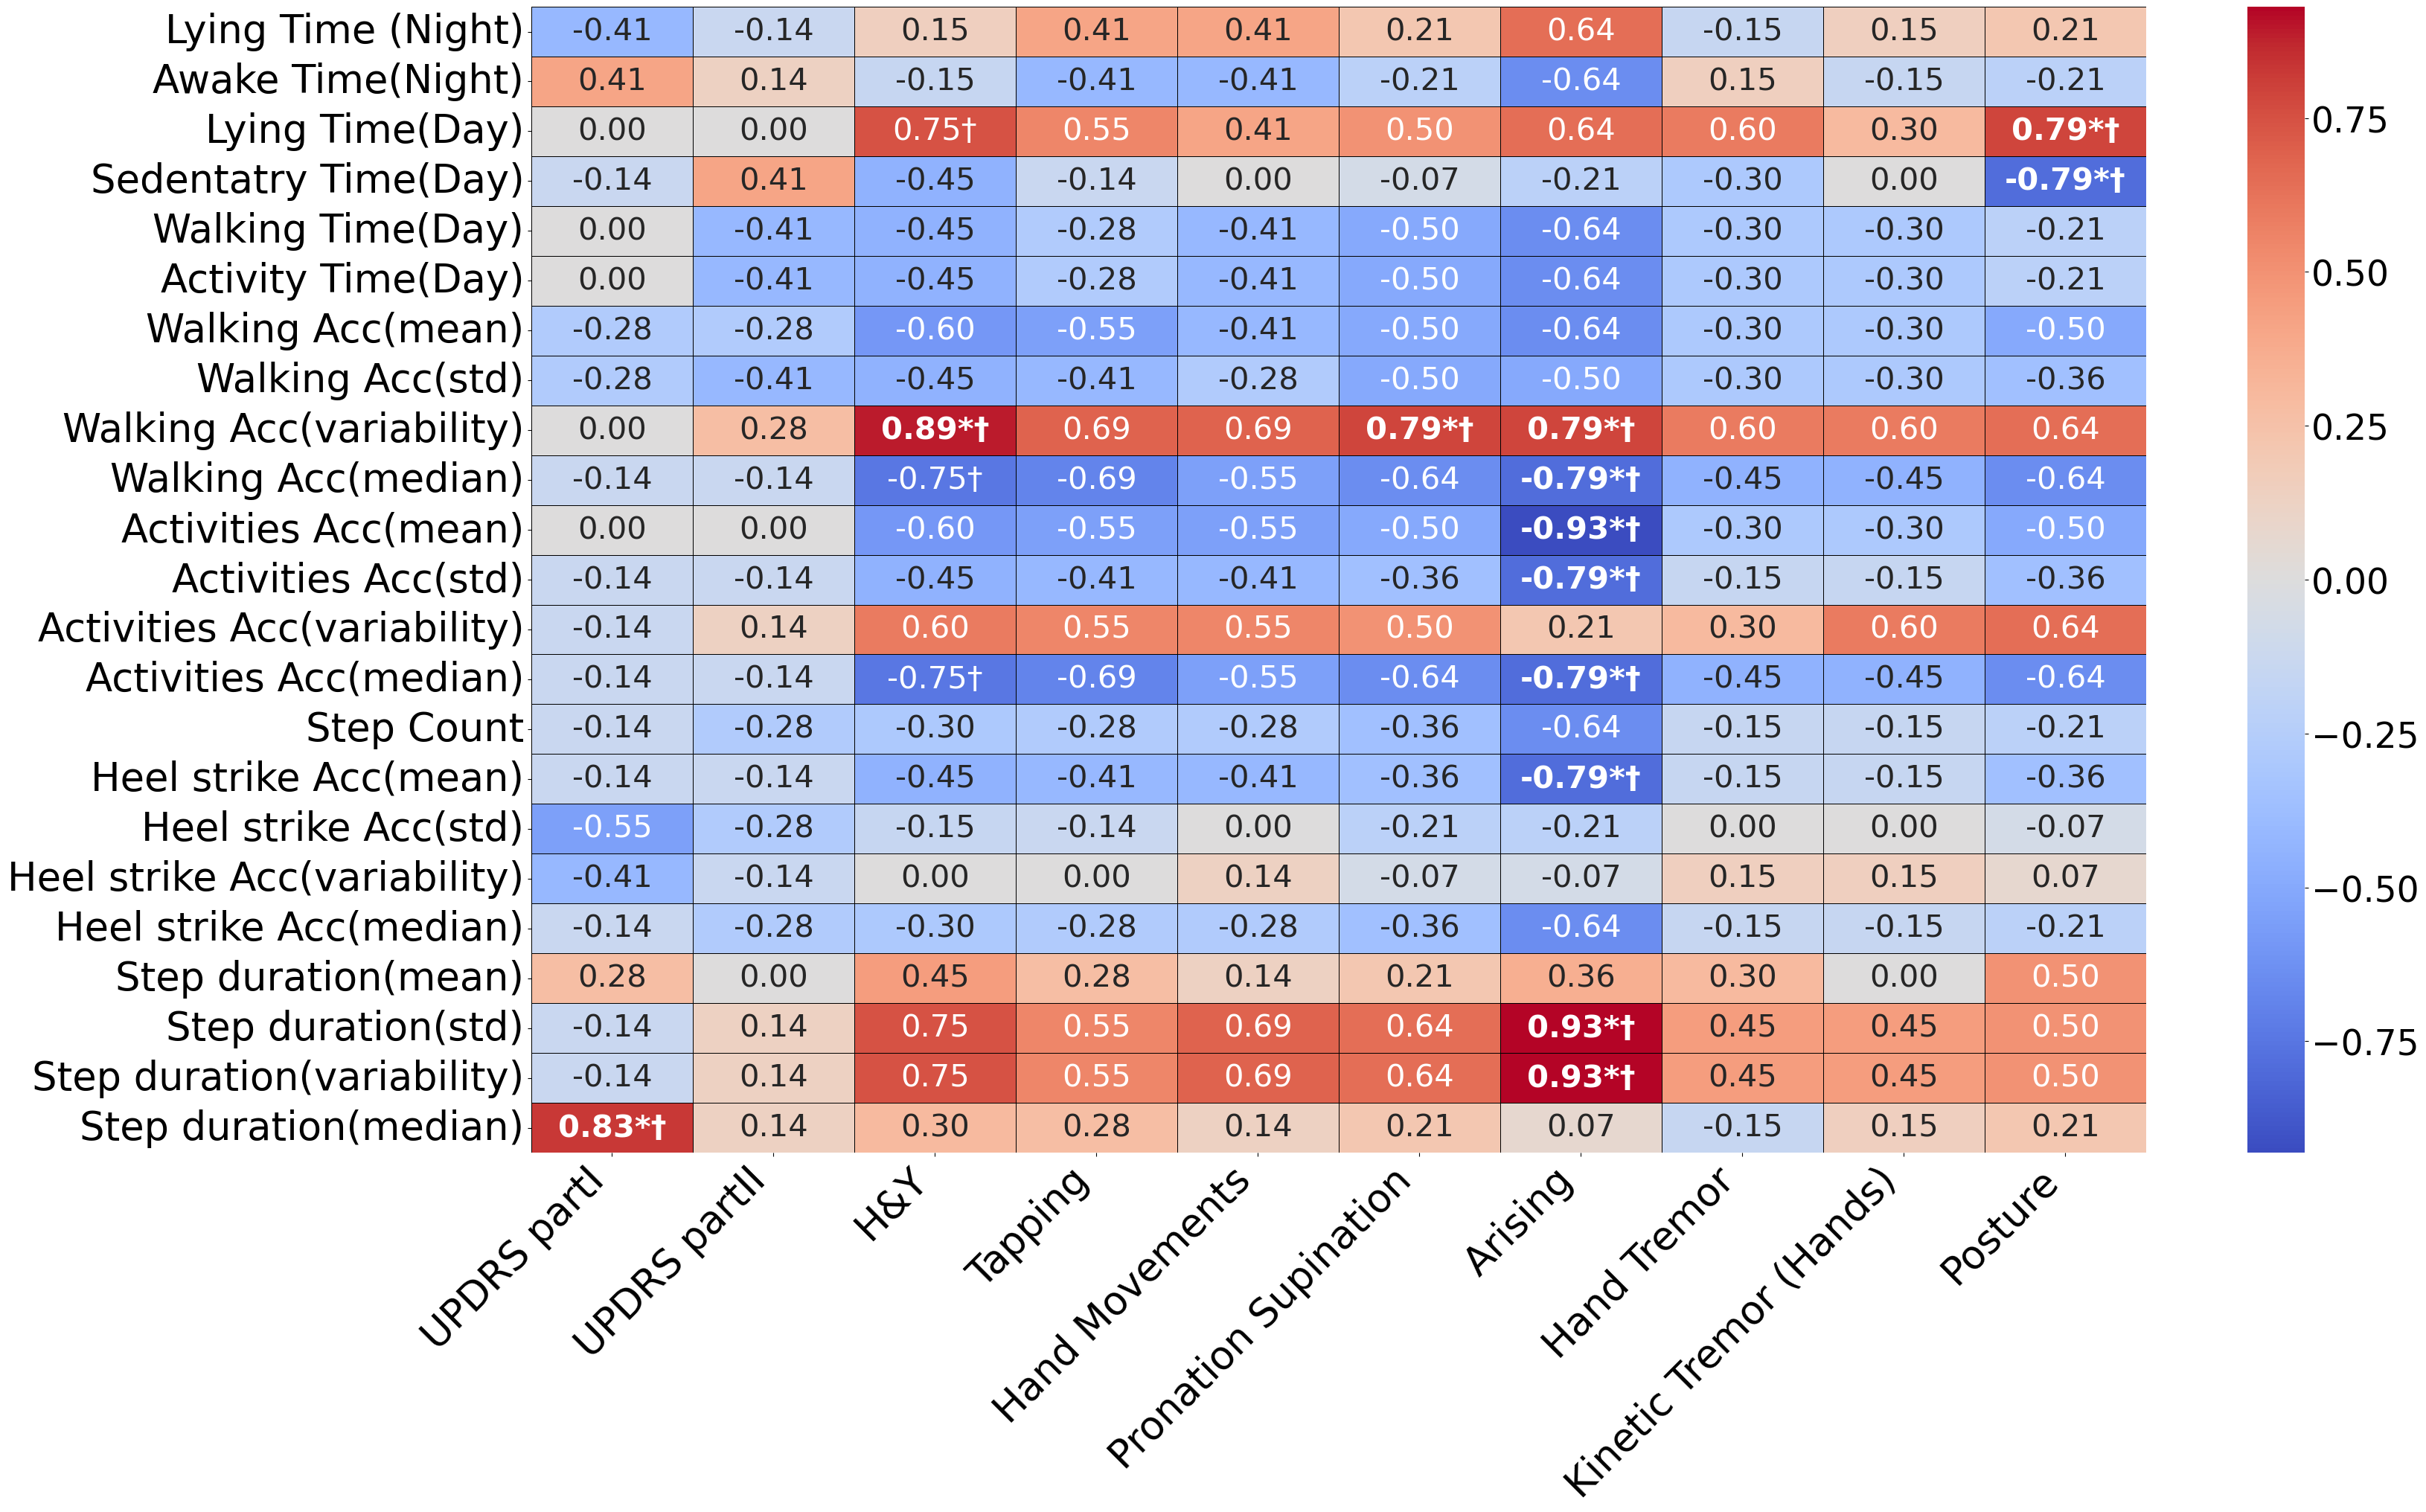

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import os

PosSel='Body' # position of 
fontsize1=38 # font in correlation figure
SaveFigureTitle=(os.path.join('results', 'CorrelationMap'+ PosSel))# define filename for saving 

#-------------------------------------------------------
# Step 1: Read the .mat file
MatlabData= scipy.io.loadmat(os.path.join('results', PosSel +'Kendall'+'.mat'))
df = pd.DataFrame(MatlabData['values'])
p_values_df = pd.DataFrame(MatlabData['pvalues'])
MatlabData= scipy.io.loadmat(os.path.join('results', PosSel + 'Spearman' + '.mat'))
p_values_dfsp = pd.DataFrame(MatlabData['pvalues'])

# Step 2: Get the custom annotations
# helper function: Create a custom annotation function
def custom_annotation(data, p_values,p_values2):
    annotations = data.copy().astype(str)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            value = f"{data.iloc[i, j]:.2f}"
            if p_values.iloc[i, j] < 0.01:
                value += '**'
            elif p_values.iloc[i, j] < 0.05:
                value += '*'           
                
            if p_values2.iloc[i, j] < 0.01:
                value = f"{value}††"
            elif p_values2.iloc[i, j] < 0.05:
                value = f"{value}†"        
            annotations.iloc[i, j] = value
            
    return annotations
annotations = custom_annotation(df, p_values_df,p_values_dfsp)

# Step 3: Plot the heatmap
if PosSel=='Wrist':
    plt.figure(figsize=(35,23))
elif PosSel=='Body':
    plt.figure(figsize=(35,20))

heatmap = sns.heatmap(df, annot=annotations, annot_kws={'fontsize':fontsize1-8,'horizontalalignment': 'center', 'verticalalignment': 'center'}, fmt='', cmap="coolwarm", cbar=True, linewidths=.5, linecolor='black')
# Change the color bar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=fontsize1-4)  # Set the color bar font size

# Step 4: Manually adjust the font weight of significant annotations
for t in heatmap.texts:
    if '*' in t.get_text():
        t.set_weight('bold')
        
if PosSel=='Wrist':   
    # Set custom x-axis and y-axis labels
    heatmap.set_xticklabels(['UPDRS partI', 'UPDRS partII', 'H&Y', 'PDQ39', 'Tapping', 'Hand Movements', 'Pronation Supination', 'Body bradykinesia', 'Hand Tremor', 'Kinetic Tremor (Hands)'], fontsize=fontsize1)
    heatmap.set_yticklabels(['Sleep Time(Night)', 'Sleep&Rest ratio(Night)','Awake Time(Night)','Sedentatry Time(Day)', 'Walking Time(Day)', 'Activity Time(Day)', 'Light Act Time(Day)', 'Vigorous Act Time(Day)', 'Walking Acc(mean)', 'Walking Acc(std)', 'Walking Acc(variability)', 'Walking Acc(median)', 'Activities Acc(mean)', 'Activities Acc(std)', 'Activities Acc(variability)', 'Activities Acc(median)', 'Light  Activities Acc(mean)', 'Light Activities Acc(std)', 'Light Activities Acc(variability)', 'Light Activities Acc(median)', 'Step count', 'Heel strike Acc(mean)', 'Heel strike Acc(std)', 'Heel strike Acc(variability)', 'Heel strike Acc(median)', 'Step duration(mean)', 'Step duration(std)', 'Step duration(variability)', 'Step duration(median)'], fontsize=fontsize1)
elif PosSel=='Body':
    heatmap.set_xticklabels(['UPDRS partI', 'UPDRS partII', 'H&Y', 'Tapping', 'Hand Movements', 'Pronation Supination', 'Arising', 'Hand Tremor', 'Kinetic Tremor (Hands)', 'Posture'], fontsize=fontsize1)
    heatmap.set_yticklabels(['Lying Time (Night)','Awake Time(Night)','Lying Time(Day)','Sedentatry Time(Day)', 'Walking Time(Day)', 'Activity Time(Day)', 'Walking Acc(mean)', 'Walking Acc(std)', 'Walking Acc(variability)', 'Walking Acc(median)', 'Activities Acc(mean)', 'Activities Acc(std)', 'Activities Acc(variability)', 'Activities Acc(median)', 'Step Count', 'Heel strike Acc(mean)', 'Heel strike Acc(std)', 'Heel strike Acc(variability)', 'Heel strike Acc(median)', 'Step duration(mean)', 'Step duration(std)', 'Step duration(variability)', 'Step duration(median)'], fontsize=fontsize1)
    
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=fontsize1)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=fontsize1)

plt.savefig(SaveFigureTitle, dpi=300, bbox_inches='tight')
plt.show()


